In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Loading the data and checking the first 5 rows

In [2]:
data = pd.read_csv("C:/Users/Kaana/OneDrive/Masaüstü/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Sex, smoker and region columns are registered as objects. We will convert them to numeric values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Converting categorical Sex and Smoker columns to numeric values.

In [5]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 68.1 KB


## Handling Outliers

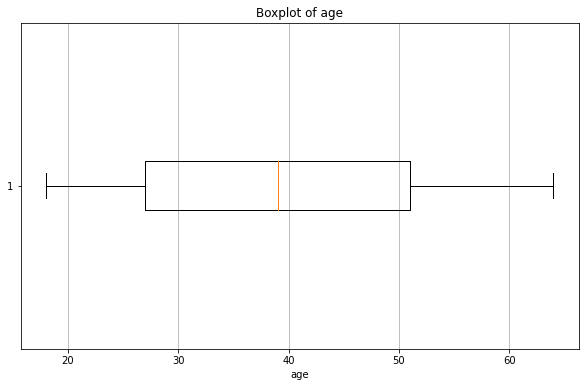

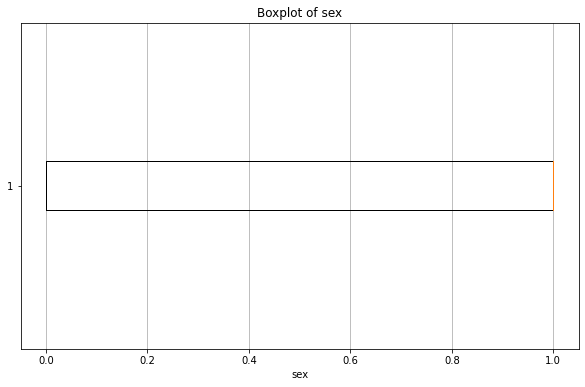

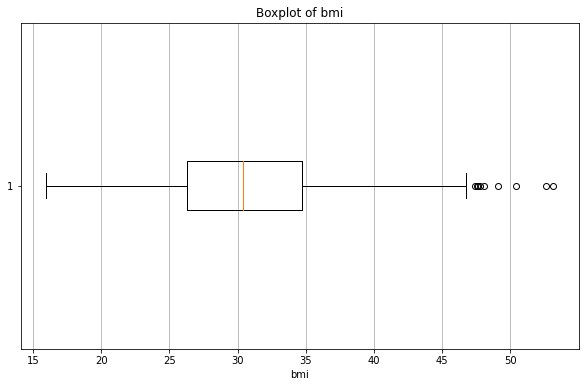

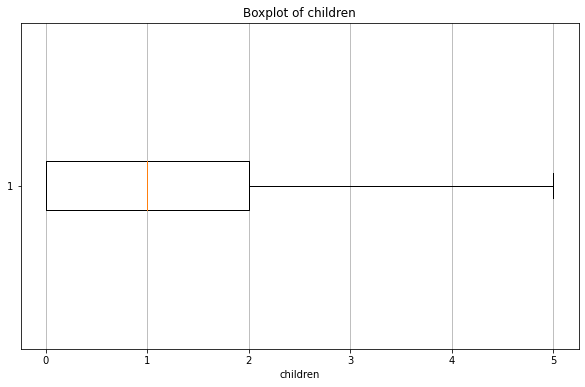

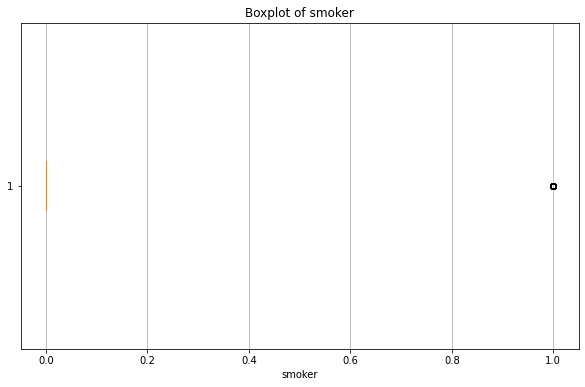

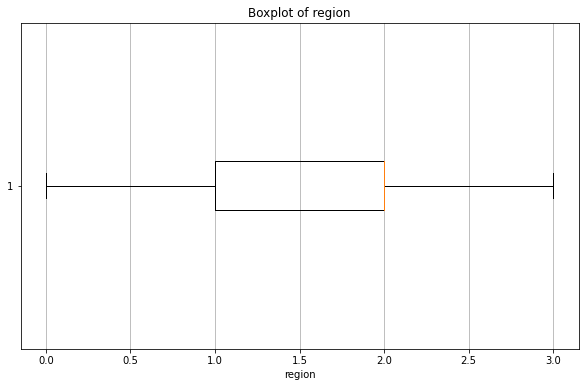

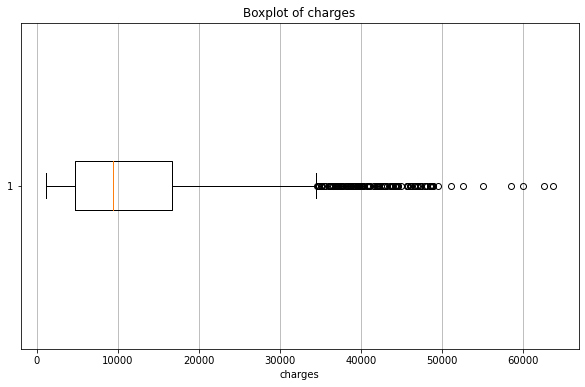

In [7]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column], vert=False)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x')
    plt.show()


### I left few outliers because if i remove these outliers, i would completely lose the smoker = 1 data.

In [8]:
for column in data.columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data.reset_index(drop=True, inplace=True)


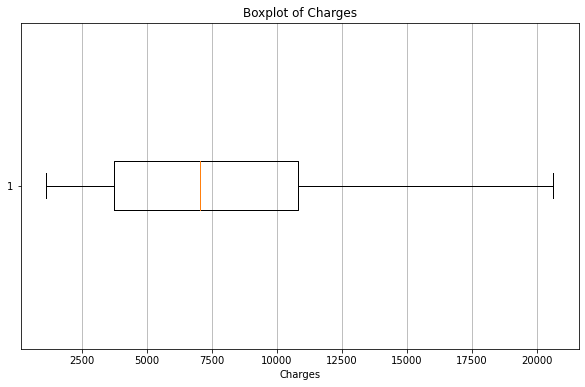

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot(data['charges'], vert=False)
plt.title('Boxplot of Charges')
plt.xlabel('Charges')
plt.grid(axis='x')
plt.show()


In [10]:
data.shape


(977, 7)

### Checking the missing values

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,977.000000,977.000000,977.000000,977.000000,977.0,977.000000,977.000000
mean,39.096213,0.481064,30.422446,1.014330,0.0,1.516888,7435.887018
std,14.078416,0.499897,5.759483,1.124339,0.0,1.114349,4310.733694
min,18.000000,0.000000,15.960000,0.000000,0.0,0.000000,1121.873900
25%,26.000000,0.000000,26.315000,0.000000,0.0,1.000000,3756.621600
50%,39.000000,0.000000,30.300000,1.000000,0.0,2.000000,7046.722200
75%,51.000000,1.000000,34.210000,2.000000,0.0,3.000000,10797.336200
max,64.000000,1.000000,44.770000,4.000000,0.0,3.000000,20630.283510


# EDA

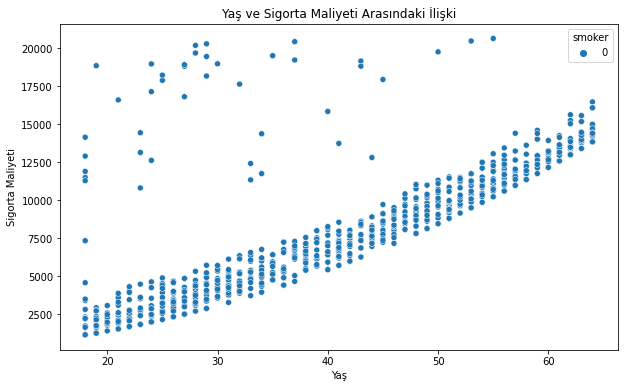

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.title('Yaş ve Sigorta Maliyeti Arasındaki İlişki')
plt.xlabel('Yaş')
plt.ylabel('Sigorta Maliyeti')
plt.show()

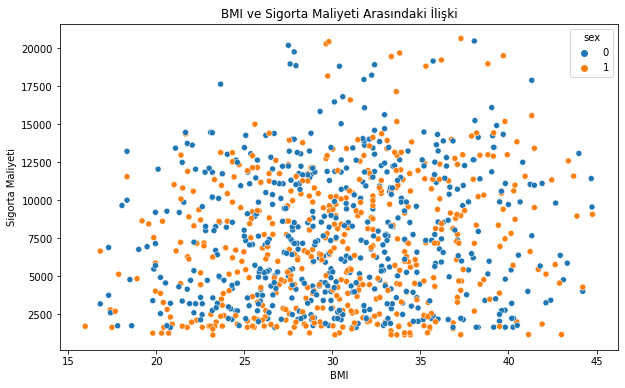

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex')
plt.title('BMI ve Sigorta Maliyeti Arasındaki İlişki')
plt.xlabel('BMI')
plt.ylabel('Sigorta Maliyeti')
plt.show()

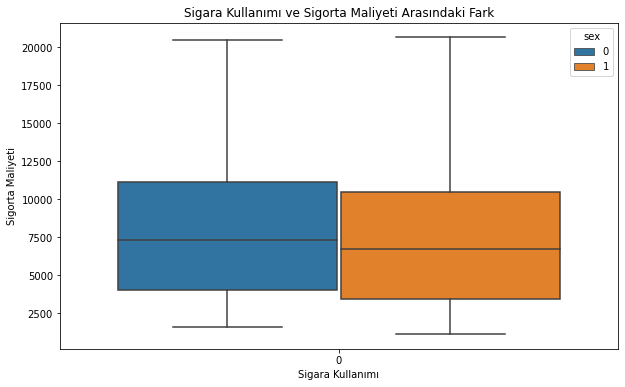

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='smoker', y='charges',hue='sex')
plt.title('Sigara Kullanımı ve Sigorta Maliyeti Arasındaki Fark')
plt.xlabel('Sigara Kullanımı')
plt.ylabel('Sigorta Maliyeti')
plt.show()

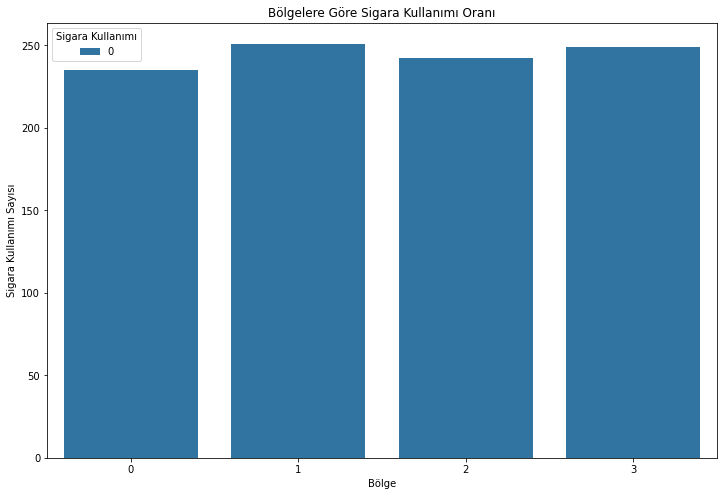

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='region', hue='smoker')
plt.title('Bölgelere Göre Sigara Kullanımı Oranı')
plt.xlabel('Bölge')
plt.ylabel('Sigara Kullanımı Sayısı')
plt.legend(title='Sigara Kullanımı')
plt.show()

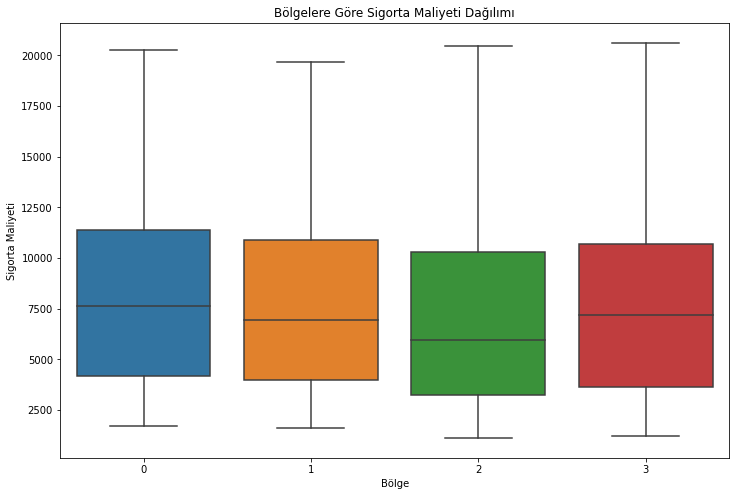

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region', y='charges')
plt.title('Bölgelere Göre Sigorta Maliyeti Dağılımı')
plt.xlabel('Bölge')
plt.ylabel('Sigorta Maliyeti')
plt.show()

### Seems like smoker people were defining the outlier data.

# Train, Test Split, Data Scaling, Model Building

In [18]:
X = data.drop('charges', axis=1)
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

R2 Score: 0.7456346449009859
Mean Squared Error: 4404209.513762079
Root Mean Squared Error: 2098.620859936849


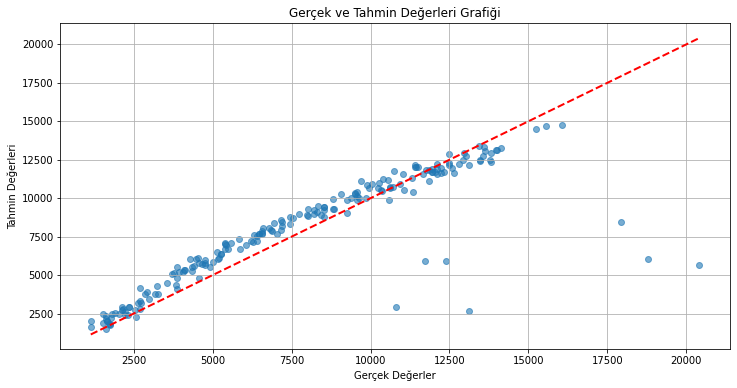

In [21]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Gerçek ve Tahmin Değerleri Grafiği')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')
plt.grid()
plt.show()


In [22]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_tree_pred = tree_model.predict(X_test_scaled)

tree_r2 = r2_score(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_rmse = tree_mse ** 0.5

print(f'Decision Tree R2 Score: {tree_r2}')
print(f'Decision Tree Mean Squared Error: {tree_mse}')
print(f'Decision Tree Root Mean Squared Error: {tree_rmse}')


Decision Tree R2 Score: 0.4483074000352534
Decision Tree Mean Squared Error: 9552282.7646519
Decision Tree Root Mean Squared Error: 3090.6767486509975


## Desicion Tree does not work well.
### But i am satisfied with the linear regression model.